## 5300 Final: Double Pendulum

In [42]:
%matplotlib inline

import numpy as np
from scipy.integrate import odeint, solve_ivp

import matplotlib.pyplot as plt

In [43]:
# Change the common font size
font_size = 14
plt.rcParams.update({'font.size': font_size})

In [44]:
class DoublePendulum():a
    """
    double pendulum class implements the parameters and Lagrange's equations for 
     a simple double pendulum (no driving or damping).
     
    Parameters
    ----------
    L1 : float
        length of the first simple pendulum
    L2 : float
        length of the second simple pendulum
    g : float
        gravitational acceleration at the earth's surface
    m1 : float
        mass of the first pendulum
    m2 : float
        mass of the second pendulum

    Methods
    -------
    dy_dt(t, y)
        Returns the right side of the differential equation in vector y, 
        given time t and the corresponding value of y.
    """
    def __init__(self, L1=1., L2=1., m1=1., m2=1., g=1.):
        self.L1 = L1
        self.L2 = L2
        self.g = g
        self.m1 = m1
        self.m2 = m2
    
    def dy_dt(self, t, y):
        """
        This function returns the right-hand side of the diffeq: 
        [dtheta1/dt dtheta1_dot/dt dtheta2/dt dtheta2_dot/dt]
        
        Parameters
        ----------
        t : float
            time 
        y : float
            A 4-component vector with y[0] = theta1, y[1] = theta1_dot, y[2] = theta2, and y[3] = theta2_dot
    
            
        Returns
        -------
        
        """
        
        theta1, z1, theta2, z2 = y
        
        c = np.cos(theta1 - theta2)
        s = np.sin(theta1 - theta2)
        
        theta1_dot = z1
        z1_dot = (self.m2*self.g * np.sin(theta2) * c \
                  - self.m2*s*(self.L1 * z1**2 * c + self.L2 * z2**2) \
                  - (self.m1 + self.m2) * self.g * np.sin(theta1) ) \
                  / (self.L1 * (self.m1 + self.m2 * s**2))
                 
        theta2_dot = z2
        z2_dot = ( (self.m1 + self.m2) * (self.L1 * z1**2 * s \
                    - self.g * np.sin(theta2) + self.g * np.sin(theta1) * c) \
                    + self.m2 * self.L2 * z2**2 * s * c) \
                    / (self.L2 * (self.m1 + self.m2 * s**2))
        
        return theta1_dot, z1_dot, theta2_dot, z2_dot
    
    def solve_ode(self, t_pts, theta1_0, theta1_dot_0, theta2_0, theta2_dot_0,
                  abserr=1.0e-10, relerr=1.0e-10):
        """
        Solve the ODE given initial conditions.
        Specify smaller abserr and relerr to get more precision.
        """
        y = [theta1_0, theta1_dot_0, theta2_0, theta2_dot_0] 
        solution = solve_ivp(self.dy_dt, (t_pts[0], t_pts[-1]), 
                             y, t_eval=t_pts, 
                             atol=abserr, rtol=relerr)
        theta1, theta1_dot, theta2, theta2_dot = solution.y

        return theta1, theta1_dot, theta2, theta2_dot
    
    def calc_E(y):
        """Return the total energy of the system."""
        
        th1, th1d, th2, th2d = y.T
        V = -(m1+m2)*L1*g*np.cos(th1) - m2*L2*g*np.cos(th2)
        T = 0.5*m1*(L1*th1d)**2 + 0.5*m2*((L1*th1d)**2 + (L2*th2d)**2 + 
                2*L1*L2*th1d*th2d*np.cos(th1-th2))
                                        
        return T+V

In [45]:
def plot_y_vs_x(x, y, axis_labels=None, label=None, title=None, 
                color=None, linestyle=None, semilogy=False, loglog=False,
                ax=None):
    """
    Generic plotting function: return a figure axis with a plot of y vs. x,
    with line color and style, title, axis labels, and line label
    """
    if ax is None:        # if the axis object doesn't exist, make one
        ax = plt.gca()

    if (semilogy):
        line, = ax.semilogy(x, y, label=label, 
                            color=color, linestyle=linestyle)
    elif (loglog):
        line, = ax.loglog(x, y, label=label, 
                          color=color, linestyle=linestyle)
    else:
        line, = ax.plot(x, y, label=label, 
                    color=color, linestyle=linestyle)

    if label is not None:    # if a label if passed, show the legend
        ax.legend()
    if title is not None:    # set a title if one if passed
        ax.set_title(title)
    if axis_labels is not None:  # set x-axis and y-axis labels if passed  
        ax.set_xlabel(axis_labels[0])
        ax.set_ylabel(axis_labels[1])

    return ax, line


In [46]:
def start_stop_indices(t_pts, plot_start, plot_stop):
    start_index = (np.fabs(t_pts-plot_start)).argmin()  # index in t_pts array 
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()  # index in t_pts array 
    return start_index, stop_index

In [47]:
# Labels for individual plot axes
theta_vs_time_labels = (r'$t$', r'$\theta(t)$')

# Common plotting time (generate the full time then use slices)
t_start = 0.
t_end = 50.
delta_t = 0.001


t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

L1 = 1.
L2 = 1.
m1 = 1.
m2 = 1.
g = 1.


# Instantiate a double pendulum 
dp1 = DoublePendulum(L1=L1, L2=L2, m1=m1, m2=m2, g=g)

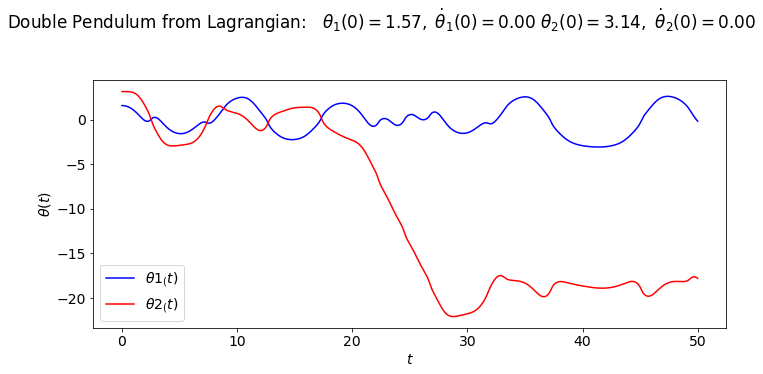

In [48]:
# initial conditions
theta1_0 = np.pi/2.
theta1_dot_0 = 0.
theta2_0 = np.pi
theta2_dot_0 = 0.

theta1, theta1_dot, theta2, theta2_dot = dp1.solve_ode(t_pts, theta1_0, theta1_dot_0, theta2_0, theta2_dot_0)

# start the plot!
fig = plt.figure(figsize=(10,5))
overall_title = 'Double Pendulum from Lagrangian:  ' + \
                rf' $\theta_1(0) = {theta1_0:.2f},$' + \
                rf' $\dot\theta_1(0) = {theta1_dot_0:.2f}$' + \
                rf' $\theta_2(0) = {theta2_0:.2f},$' + \
                rf' $\dot\theta_2(0) = {theta2_dot_0:.2f}$' 

fig.suptitle(overall_title, va='baseline')
    
ax_a = fig.add_subplot(1,1,1)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], theta1[start : stop], 
            axis_labels=theta_vs_time_labels, 
            color='blue',
            label=r'$\theta1_(t)$', 
            ax=ax_a)    

plot_y_vs_x(t_pts[start : stop], theta2[start : stop], 
            color='red',
            label=r'$\theta2_(t)$', 
            ax=ax_a)    

fig.tight_layout()

## Chaos Plot

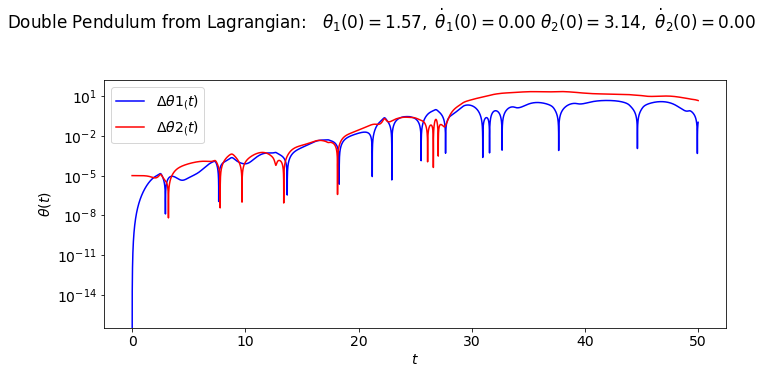

In [49]:
# initial conditions
theta1_0 = np.pi/2.
theta1_dot_0 = 0.
theta2_0 = np.pi
theta2_dot_0 = 0.

theta1, theta1_dot, theta2, theta2_dot = dp1.solve_ode(t_pts, theta1_0, theta1_dot_0, theta2_0, theta2_dot_0)
theta1b, theta1b_dot, theta2b, theta2b_dot = \
        dp1.solve_ode(t_pts, theta1_0, theta1_dot_0, theta2_0 - 0.00001, theta2_dot_0)


# start the plot!
fig = plt.figure(figsize=(10,5))
overall_title = 'Double Pendulum from Lagrangian:  ' + \
                rf' $\theta_1(0) = {theta1_0:.2f},$' + \
                rf' $\dot\theta_1(0) = {theta1_dot_0:.2f}$' + \
                rf' $\theta_2(0) = {theta2_0:.2f},$' + \
                rf' $\dot\theta_2(0) = {theta2_dot_0:.2f}$' 

fig.suptitle(overall_title, va='baseline')
    
ax_a = fig.add_subplot(1,1,1)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    

plot_y_vs_x(t_pts[start : stop], np.abs(theta1[start : stop] - theta1b[start : stop]), 
            axis_labels=theta_vs_time_labels, 
            color='blue', semilogy=True,
            label=r'$\Delta\theta1_(t)$', 
            ax=ax_a)    
            
plot_y_vs_x(t_pts[start : stop], np.abs(theta2[start : stop] - theta2b[start : stop]), 
            axis_labels=theta_vs_time_labels, 
            color='red', semilogy=True,
            label=r'$\Delta\theta2_(t)$', 
            ax=ax_a)    

fig.tight_layout()